# Working demonstration

In [1]:
# Set up notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from rompy.model import ModelRun
from rompy.swan import SwanConfig
import yaml
import matplotlib.pyplot as plt
import xarray as xr
from cartopy import crs as ccrs
from wavespectra import read_swan

## Run rompy

In [3]:
with open("./model_swan_example_testdata.yml", "r") as stream:
    kwargs = yaml.load(stream, Loader=yaml.FullLoader)

# !cat ./model_swan_example_testdata.yml

In [4]:
run = ModelRun(**kwargs)

In [5]:
grid = run.config.grid
times = run.period

run.config.outputs.spec.locations

OutputLocs
  -37.96 174.61
  -37.96 174.62
  -37.97 174.62

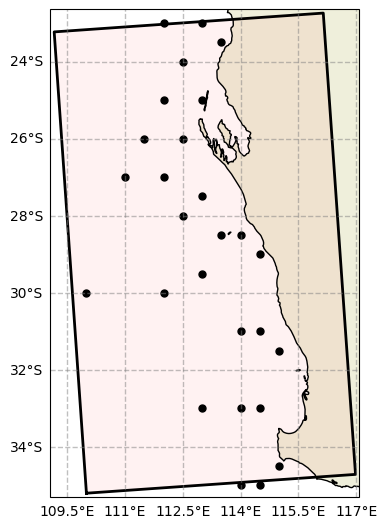

In [6]:
# Check the grid and spectral boundary points

ds = run.config.forcing.boundary.ds[["lat", "lon"]]

fig, ax = grid.plot()
p = ax.plot(ds.lon, ds.lat, "ok", markersize=5, transform=ccrs.PlateCarree())

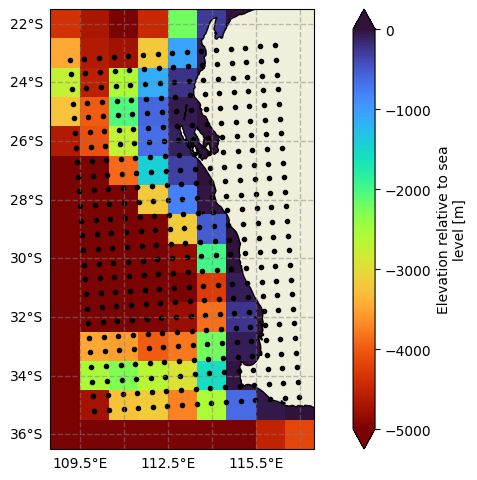

In [7]:
# Plot bottom grid to check

run.config.forcing.bottom._filter_grid(grid=grid, buffer=1.0)
fig, ax = run.config.forcing.bottom.plot(param="elevation", vmin=-5000, vmax=0, cmap="turbo_r")
p = ax.plot(run.config.grid.x, run.config.grid.y, ".k")

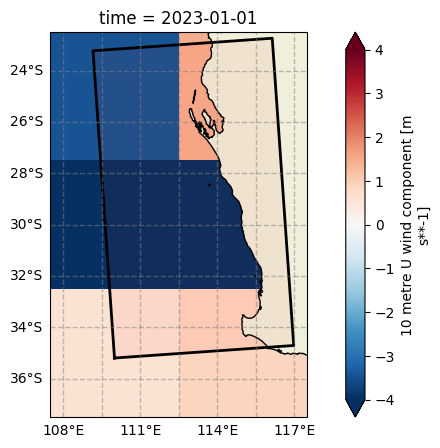

In [8]:
# Plot a single time step of the wind as a check
# (note that these next three lines are done internally within the wrapper, 
# we may want to write convenience methods for this)

run.config.forcing.wind._filter_grid(grid=grid, buffer=2.0)
run.config.forcing.wind._filter_time(time=times)
fig, ax = run.config.forcing.wind.plot(
    isel={"time": 0},
    param="u10",
    model_grid=grid,
    cmap="RdBu_r",
    vmin=-4,
    vmax=4,
    extend="both",
)

In [9]:
run()

INFO:rompy.model:
INFO:rompy.model:-----------------------------------------------------
INFO:rompy.model:Model settings:
INFO:rompy.model:
period: 

	Start: 2023-01-01 00:00:00
	End: 2023-01-01 06:00:00
	Duration: 6:00:00
	Interval: 1:00:00
	Include End: True


output_dir: 
simulations

config: 
grid: 
	SwanGrid: REG, 15x25
spectral_resolution: 
	fmin=0.0464 fmax=1.0 nfreqs=31 ndirs=36
forcing: 
	bottom: SourceIntake(catalog_uri=../tests/data/catalog.yaml, dataset_id=gebco)
	wind: SourceIntake(catalog_uri=../tests/data/catalog.yaml, dataset_id=era5)
	boundary: SourceIntake(catalog_uri=../tests/data/catalog.yaml, dataset_id=ausspec)

physics: 
	friction='MAD' friction_coeff=0.1
outputs: 
	Grid:
	variables: DEPTH UBOT HSIGN HSWELL DIR TPS TM01 WIND
	Spec
		locations:   -37.96 174.61
  -37.96 174.62
  -37.97 174.62


template: 
	/source/csiro/rompy/rompy/templates/swan

INFO:rompy.model:-----------------------------------------------------
INFO:rompy.model:Generating model input files in

INFO:rompy.swan.legacy:	 Processing wind forcing
INFO:rompy.swan.data:	Writing wind to simulations/oceanum/wind.grd
INFO:rompy.swan.legacy:	 Processing boundary forcing
INFO:rompy.model:
INFO:rompy.model:Successfully generated project in simulations
INFO:rompy.model:-----------------------------------------------------


'/source/csiro/rompy/notebooks/simulations/oceanum'

## Run SWAN

In [15]:
# Run the model

# !docker run  -v ./simulations/oceanum:/home oceanum/swan:4141 swan.exe 

## Plot outputs

In [16]:
# ax = plt.axes(projection=ccrs.PlateCarree())
# output = xr.open_dataset('simulations/oceanum/outputs/swan_out.nc')
# output.hs.isel(time=-1).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

In [17]:
# ll simulations/oceanum

In [18]:
# output = xr.open_dataset('simulations/oceanum/outputs/swan_out.nc')
# boundary = read_swan('simulations/oceanum/bnd.bnd')

In [19]:
# x = run.config.grid.x
# y = run.config.grid.y
# vmin = 0.8
# vmax = 1.3

# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# ds = output.hs.isel(time=-1)
# bnd = boundary.sel(time=ds.time).spec.hs()

# p = ax.pcolormesh(x, y, ds, transform=ccrs.PlateCarree(), cmap="turbo", vmin=vmin, vmax=vmax)
# ax.scatter(boundary.lon, boundary.lat, 50, c=bnd, cmap="turbo", vmin=vmin, vmax=vmax, edgecolor="k", transform=ccrs.PlateCarree())
# plt.colorbar(p)

In [20]:
# Zip the run 
# run.zip()